<a href="https://colab.research.google.com/github/viniciusanl/Natural-Language-Analysis-And-Processing/blob/main/natural_language_analysis_and_processin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pra esse trabalho, vamos utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

**Importar bibliotecas necessárias**

In [187]:
import nltk, re, pprint, string, urllib.request

Download de todos os componentes necessários da biblioteca NLTK

In [188]:
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

Criando as stopwords em português e inglês

In [189]:
english_stopwords = nltk.corpus.stopwords.words('english')
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

Criando a função de processamento de texto

In [190]:
def processing_text(str_text, _stopwords):
  for i in string.punctuation:
    str_text = str_text.lower().replace(i, '')

  text_format = str_text.replace('\n', ' ').replace('\x97', '').split(' ')
  #text_format = str_text.split(' ')

  no_stopwords = [words for words in text_format if words not in _stopwords]

  return(' '.join(no_stopwords))

Escolhendo os textos a serem utilizados na função de processamento

In [191]:
shakespeare_caesar = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt')
obra_machado = nltk.corpus.machado.raw('contos/macn002.txt')

sc_format = processing_text(shakespeare_caesar, english_stopwords)

om_format = processing_text(obra_machado, portuguese_stopwords)

tokens_sc = nltk.tokenize.word_tokenize(sc_format)

tokens_om = nltk.tokenize.word_tokenize(om_format)

prob_shakespeare = nltk.probability.FreqDist(tokens_sc)
prob_machado = nltk.probability.FreqDist(tokens_om)

Print das 10 palavras que mais se repetem nos textos

In [192]:
print(prob_shakespeare.most_common(10))
print(prob_machado.most_common(10))

[('caesar', 190), ('brutus', 161), ('bru', 153), ('haue', 147), ('shall', 125), ('thou', 115), ('cassi', 107), ('cassius', 85), ('antony', 75), ('come', 74)]
[('camilo', 158), ('disse', 158), ('luís', 130), ('moça', 118), ('ernesto', 115), ('tempo', 100), ('tudo', 89), ('capítulo', 86), ('ainda', 84), ('dr', 84)]


Palavra que mais se repete

In [193]:
print('Palavra que mais se repete no texto de Shakespeare Caesar: ' + prob_shakespeare.max())
print('Palavra que mais se repete no texto do Machado de Assis: ' + prob_machado.max())

Palavra que mais se repete no texto de Shakespeare Caesar: caesar
Palavra que mais se repete no texto do Machado de Assis: camilo


Plot de 20 palavras que mais se repete nas obras

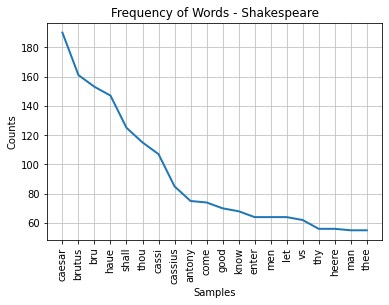

In [194]:
prob_shakespeare.plot(20, title='Frequency of Words - Shakespeare')

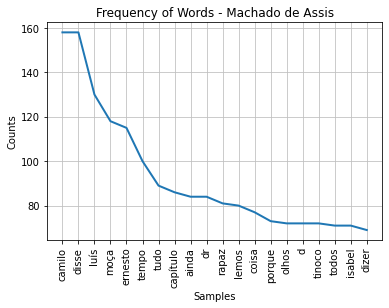

In [195]:
prob_machado.plot(20, title='Frequency of Words - Machado de Assis')

In [196]:
analytics_sc = nltk.Text(tokens_sc)
analytics_om = nltk.Text(tokens_om)

Similaridade de palavras

In [197]:
analytics_om.similar('camilo')

formosa sra salto


In [199]:
analytics_sc.similar('caesar')

enter know would antony heere bid loue bru please mark affraid liuing
octauius rose


Bigramas de texto

In [200]:
analytics_om.collocations()

luís tinoco; luís negreiros; nariz comprido; josé lemos; rapaz nariz;
alguma coisa; filho comendador; goivos camélias; tenente porfírio;
raquel capítulo; padre maciel; leandro soares; justiniano vilela;
espírito santo; dia seguinte; algum tempo; caramanchão literário; rio
janeiro; correio mercantil; major brás


In [201]:
analytics_sc.collocations()

mark antony; marke antony; ides march; thou art; thou hast; good
morrow; caius ligarius; metellus cymber; art thou; exeunt manet; mine
owne; varrus claudio; fell downe; lord bru; good night; haue seene;
enter lucius; beware ides; would haue; shall finde


In [202]:
text_web = urllib.request.urlopen("https://www.gutenberg.org/files/45438/45438-8.txt").read()

book_la_isla_del_tesoro = processing_text(str(text_web, 'latin1'), spanish_stopwords)

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
